<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/Text_strikethrough_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pillow
!pip install pytesseract

In [0]:
#github link for the real captchas dataset
#https://github.com/navneetkrc/Colab_fastai/raw/master/CAPTCHA_recognition/real_captchas.zip

!unzip real_captchas.zip

In [0]:
!sudo apt-get install tesseract-ocr
!mkdir clean_capchas

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image as pyimg, display



In [0]:
def clear_captchas(file_name, i):
  
  display(pyimg(file_name))
  
  img = cv2.imread(file_name)
  img = cv2.resize(img,(450,80))
  #display(pyimg(img))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #img = cv2.resize(img,(300,80))


  img = cv2.bitwise_not(img)
  th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,17,-7)

  #cv2.imwrite("th2.png", th2)
  #display(pyimg('/content/th2.png'))


  horizontal = th2
  vertical = th2
  rows,cols = horizontal.shape
  horizontalsize = int(cols / 20)
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
  horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
  horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))

  #cv2.imwrite("horizontal.png", horizontal)
  #display(pyimg('/content/horizontal.png'))

  imorg = th2 - horizontal
  #cv2.imwrite("decoded.png", imorg)
  #display(pyimg('decoded.png'))



  #step1
  edges = cv2.adaptiveThreshold(imorg,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,-3)

  #cv2.imwrite("edges.png", edges)
  #display(pyimg("edges.png"))


  #step2
  kernel = np.ones(( 5,0), dtype = "uint8")
  dilated = cv2.dilate(edges, kernel)
  
  blur = cv2.GaussianBlur(dilated,(3,3),0)

  cv2.imwrite("/content/clean_capchas/" + str(i) + ".png",edges)
  display(pyimg("/content/clean_capchas/" + str(i) + ".png"))


In [0]:
def deco(file_name):
    #display(pyimg(file_name))
    image = cv2.imread(file_name)
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.threshold(gray1, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray2, 5)
    #gray3 = cv2.medianBlur(gray, 5)
    #cv2.imwrite("new_img.png", gray)

    text = [""]
    text.append (pytesseract.image_to_string(image))
    #print(text)
    text.append(pytesseract.image_to_string(gray1))
    #print(text)
    text.append(pytesseract.image_to_string(gray2))
    #print(text)
    text.append(pytesseract.image_to_string(gray))
    #print(text)
    #text = pytesseract.image_to_string(gray3)
    #print(text)
    return text
    

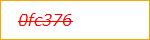

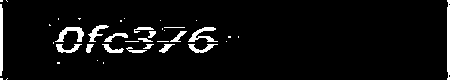

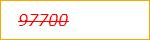

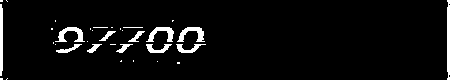

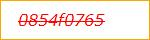

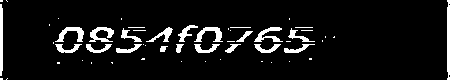

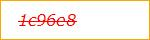

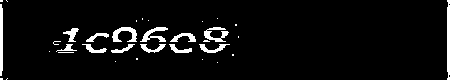

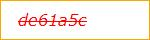

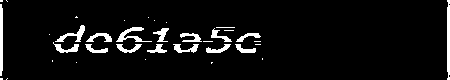

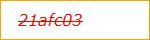

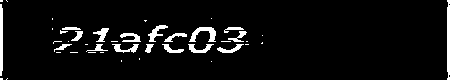

In [0]:
import os
files = (os.listdir('/content/captchas/'))
i=0
for f in files:
  i +=1
  clear_captchas('/content/captchas/' +f, i)
  #text = deco('/content/content/clean_edges_captchas/' + f)
  #print(text)
  
  if i>5:
    break

In [0]:
files[:5]

['0fc376.jpg', '97700.jpg', '0854f0765.jpg', '1c96e8.jpg', 'de61a5c.jpg']

In [0]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt




# construct the argument parse and parse the arguments

def ocr():
    ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--image", required=True,
      help="path to input image to be OCR'd")
    ap.add_argument("-p", "--preprocess", type=str, default="thresh",
      help="type of preprocessing to be done")
    args = vars(ap.parse_args())

In [0]:

# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
image = Image.open('/content/clean_capchas/1.png')
text = pytesseract.image_to_string(image)
#os.remove(filename)
print(text)
print(image)
 
# show the output images
#cv2.imwrite("Image", image)
#display(pyimg(image))



<PIL.PngImagePlugin.PngImageFile image mode=L size=450x80 at 0x7FD3C4093550>


In [0]:
# load the example image and convert it to grayscale
image = cv2.imread('/content/clean_capchas/3.png')
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.threshold(gray1, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
gray = cv2.medianBlur(gray2, 5)
text = pytesseract.image_to_string(gray)
print(text)
#gray3 = cv2.medianBlur(gray, 5)
#cv2.imwrite("new_img.png", gray)

O85 740/65


In [0]:
def deco(file_name):
    display(pyimg(file_name))
    image = cv2.imread(file_name)
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.threshold(gray1, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray2, 9)
    #gray3 = cv2.medianBlur(gray, 5)
    #cv2.imwrite("new_img.png", gray)


    text = pytesseract.image_to_string(image)
    #print(text)
    text = pytesseract.image_to_string(gray1)
    #print(text)
    text = pytesseract.image_to_string(gray2)
    #print(text)
    text = pytesseract.image_to_string(gray)
    print(text)
    #text = pytesseract.image_to_string(gray3)
    #print(text)

In [0]:
!ls

captchas  clean_capchas  real_captchas.zip  sample_data


In [0]:
files = os.listdir('/content/clean_capchas')
files[:5]


['6.png', '1.png', '4.png', '5.png', '2.png']

In [0]:
for f in files:
  deco('/content/content/clean__edges_captchas/' + f)

In [0]:
os.listdir('/content/clean_captchas')

FileNotFoundError: ignored